# DATA 620 Final Redux:
## Jazz Musicians Network Analysis & Text Analysis on Personal Writings 
### Author: Kevin Kirby


## libraries and Imports

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
import re, sys, trafilatura
from nltk.sentiment import SentimentIntensityAnalyzer

import numpy as np

## Jazz Musicians Network Analysis Investgation

I found out early on that Jazz musicians are social creatives by nature. 198 people getting everyone ready.

In [2]:
with open('jazz.net', 'r') as f:
    lines = f.readlines()

with open('jazz_fixed.net', 'w') as f:
    for line in lines:
        if line.strip().startswith("*Vertices"):
            num_vertices = int(line.split()[1])
            f.write(line)
            for i in range(1, num_vertices + 1):
                f.write(f'{i} "{i}"\n')
        elif not line.strip().startswith("*Vertices"):
            f.write(line)

jazzfixed = nx.read_pajek('jazz_fixed.net')
jf_undirected = nx.Graph(jazzfixed.to_undirected()) 

print(f" {jazzfixed.number_of_nodes()} musicians had {jazzfixed.number_of_edges()} collaborations")


 198 musicians had 5484 collaborations


### 1. Analysis by muscian's centrality

It's interesting to sde the quick up front drop off, following nacl a second half flattning out. I was expecting a lot of high values upfront and then a rapid tapering but that's more appropriate for popularity. 

In [3]:
degree_cent = nx.degree_centrality(jazzfixed)
top_10 = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 musician by degree centrality")
for i, (node, cent) in enumerate(top_10, 1):
    connections = jazzfixed.degree(node)
    print(f"  {i:2}. Musician {node:3} {connections} collaborations. 3. ({cent:.3f})")

Top 10 musician by degree centrality
   1. Musician 136 200 collaborations. 3. (1.015)
   2. Musician 60  192 collaborations. 3. (0.975)
   3. Musician 132 150 collaborations. 3. (0.761)
   4. Musician 168 148 collaborations. 3. (0.751)
   5. Musician 70  124 collaborations. 3. (0.629)
   6. Musician 99  120 collaborations. 3. (0.609)
   7. Musician 108 120 collaborations. 3. (0.609)
   8. Musician 83  118 collaborations. 3. (0.599)
   9. Musician 158 118 collaborations. 3. (0.599)
  10. Musician 7   114 collaborations. 3. (0.579)


### 2. Community detection

I wondering what drove them to these three places versus others. Networking effect takes over at some point but, in the beginning, there's a different kind of reasoning.

In [4]:
communities = list(greedy_modularity_communities(jazzfixed))

print(f"\n Found {len(communities)} communities")
sizes = sorted([len(c) for c in communities], reverse=True)
print(f"  Largest 5 communities: {sizes[:5]}")
print(f"  Total musicians in communities: {sum(sizes)}")


 Found 3 communities
  Largest 5 communities: [69, 66, 63]
  Total musicians in communities: 198


### 3. Visualizations

The large red nodes are the centrsal figures, connecting to amost everyone. This quickly peters out, leaving the lesser knowsn almost entirely on their own. This is collaboration inequality and it's very common in this kind of world.

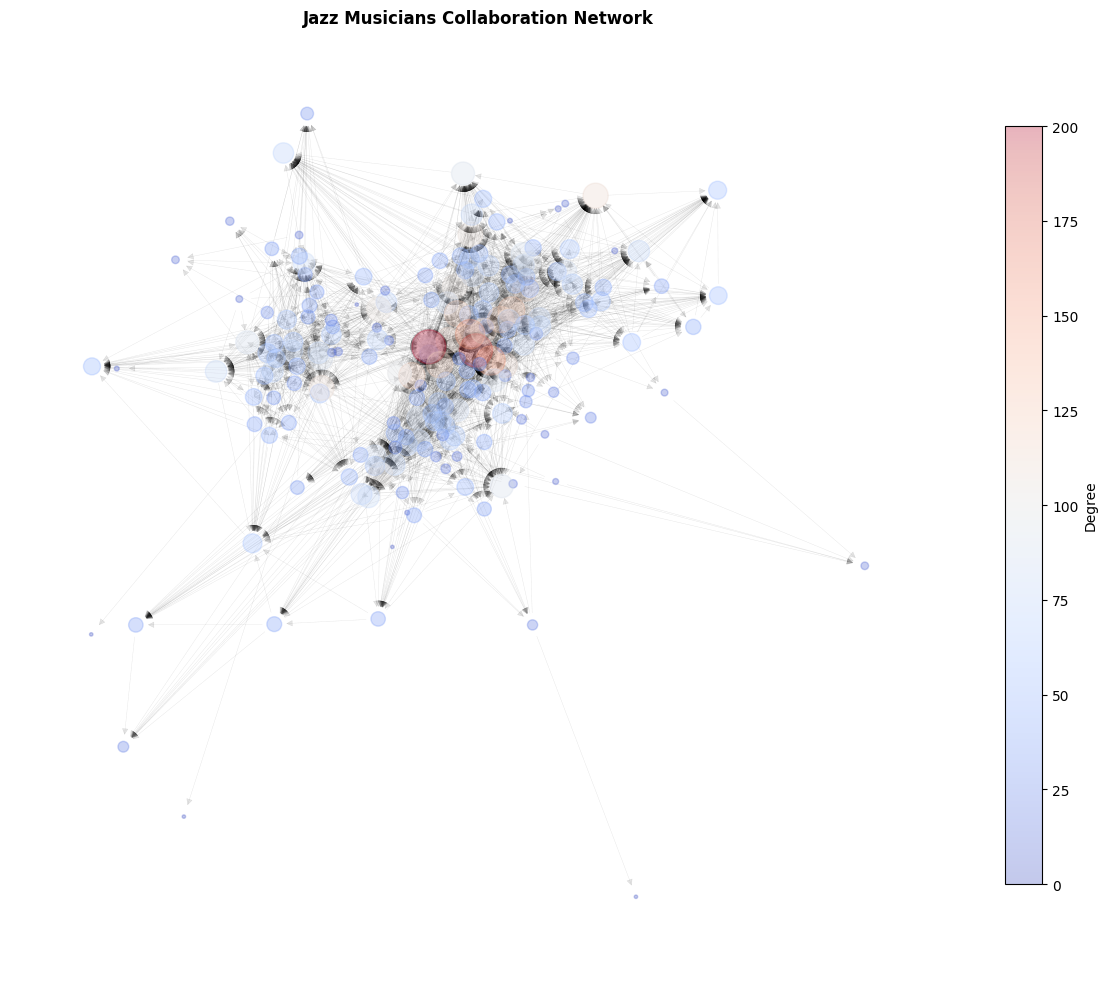

In [ ]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(jazzfixed, seed=42, k=0.3)  
node_colors = [jazzfixed.degree(n) for n in jazzfixed.nodes()]
node_sizes = [jazzfixed.degree(n)*3 for n in jazzfixed.nodes()]

im = nx.draw_networkx_nodes(
    jazzfixed, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap='coolwarm',
    alpha=0.3,
    vmin=0,
    vmax=max(node_colors)
    )

nx.draw_networkx_edges(jazzfixed, pos, alpha=0.05, width=0.3) 

plt.title("Jazz Musicians Collaboration Network", fontsize=12, weight='bold')
plt.axis('off')
plt.colorbar(im, label='Degree', shrink=0.8)
plt.tight_layout()
plt.savefig('/Users/uwsthoughts/Desktop/github_sync/dolly_shield/data620_finalwork/jazz_final.png', dpi=150, bbox_inches='tight')


### Analysis

The jazz musicians network is a study in imbalance. Centrality analysis exposes a sharp hierarchy: Musician 136 sits at the top with 200 collaborations abd a centrality score of 1.015, trailed by Musician 60 at 192 and 0.975. This is collaboration inequality, with a handful of musicians keeping it all together. The sharp cliff after the top two is interesting but predictable because we live in a world where a small group holds most of the influence.

Community detection tells a different story. Despite the network’s size, these musicians sort themselves into three almost evenly sized groups: 69, 66, and 63 members. That eveness suggests that the jazz community finds a way to maintain balance across geography, style, and era. All 198 musicians fit into these three pockets, with little crossover or lone operators drifting between.

The visualization shows this in action. Node size and color reflect degree centrality; the spring layout algorithm shows natural clusters centered around red node. The red nodes brid communities and smaller, peripheral players stick to their local circles.

## Sentiment Analysis of Personal Blog Posts with NLTK

I took writings I've published on my website and performed sentiment analysis on them, allowing for an interesting look into how I've changed over time.    

In [7]:
love_2021 = "https://www.uwsthoughts.com/love-2021/"
Love_2022 = "https://www.uwsthoughts.com/love-2022/"
Love_2024 = "https://www.uwsthoughts.com/love-2024/"

In [8]:
def analyze_url(url):
    love_note = trafilatura.fetch_url(url, no_ssl=True)
    if not love_note:
        raise RuntimeError("better luck next time")
    love_thoughts = trafilatura.extract(love_note, include_comments=False, include_tables=False)
    if not love_thoughts:
        raise RuntimeError("extraction failed")
    love_thoughts = re.sub(r"\n{2,}", "\n\n", love_thoughts.strip())
    vibe_machine = SentimentIntensityAnalyzer()
    love_vibes = vibe_machine.polarity_scores(love_thoughts)
    micro_vibes = [p.strip() for p in love_thoughts.split("\n") if p.strip()]
    per_para = [{"paragraph": p, **vibe_machine.polarity_scores(p)} for p in micro_vibes]
    return love_vibes, per_para

In [9]:
year_vibe, intra_vibe = analyze_url(love_2021)
print(f"Love, 2021 overall sentiment:{year_vibe}")

top = sorted(intra_vibe, key=lambda x: abs(x["compound"]), reverse=True)[:5]
for row in top:
    print(f"[{row['compound']:+.3f}] {row['paragraph']}")

Love, 2021 overall sentiment:{'neg': 0.097, 'neu': 0.778, 'pos': 0.124, 'compound': 0.999}
[+0.989] The Blondish set from cercle dropped. Beautiful set. Filmed outside in the sun. Was the right balance of what I needed that week in that moment. A good beat. Visual reminders of summer and warmth. I watched the set, I could see how happy she was. I could see how happy the audience was. In that moment I had found another set that spoke to me from beginning to end. It starts with “I believe the most fascinating question in the world is - who am I? What do you mean? What do you feel when you say the word I myself. Towards the end lyrics come in - don’t you want somebody to love? Don’t you need somebody to love. Closer to the end, more lyrics. “This joy affecting all around you, feeling your power. Releasing all insecurities.” What you are escapes being - profound mystery (find quote from 1:06:45 in set
[-0.980] I spent ten years living with a violently abusive mother in the projects in Plym

In [10]:
year_vibe_2022, intra_vibe_2022 = analyze_url(Love_2022)
print(f"Love, 2022 overall sentiment:{year_vibe_2022}")

top_2022 = sorted(intra_vibe_2022, key=lambda x: abs(x["compound"]), reverse=True)[:5]
for row in top_2022:
    print(f"[{row['compound']:+.3f}] {row['paragraph']}")


Love, 2022 overall sentiment:{'neg': 0.11, 'neu': 0.742, 'pos': 0.149, 'compound': 0.9987}
[+0.967] There are no cures to any of what I’m experiencing, only symptom management and relief. I am blessed that I had really good health to begin with so I had a lot of slack to give, the fall was cushioned. I’m also blessed that a lot of symptoms people have are symptoms I’ve always had due to severe ADHD. I’ve always taken meticulous notes and written things down, otherwise I forget them. I had pretty strong structures for memory recall, which became important. The long covid experience isn't usually one of permanently forgetting, it's usually one of fog that impairs memory recall. I don’t really allow myself to be scheduled in a lot of back to back meetings as to ensure my brain gets rest during the day. I meter my energy and diligently don’t allow dangerous situations to develop.
[+0.963] After the wedding was a parade where you basically party in the street and takes shots of mezcal (for 

In [11]:
year_vibe_2024, intra_vibe_2024 = analyze_url(Love_2024)
print(f"Love, 2024 overall sentiment:{year_vibe_2024}")

top_2024 = sorted(intra_vibe_2024, key=lambda x: abs(x["compound"]), reverse=True)[:5]
for row in top_2024:
    print(f"[{row['compound']:+.3f}] {row['paragraph']}")


Love, 2024 overall sentiment:{'neg': 0.071, 'neu': 0.845, 'pos': 0.085, 'compound': 0.9728}
[-0.911] Hold up. Did that say Ashkenazi Jew? I read the results again. It sure did. I was confused. Not because I have any problem with being Jewish, but why the hell was I raised Catholic? I was very confused. My dad had previously done a DNA test and I managed to cajole the results out of him. It wasn’t from his side. I texted my mom.
[-0.902] I’ve experienced a lot of significant trauma in my life. I was abused by my mother; I ran away from home to escape the abuse; I was homeless a few times growing up. Those seven days from December 25th, 2024 to January 1st 2025 are amongst the seven most traumatic of my entire life. I gave every ounce of my soul in Kitty’s final days. The whole family did.
[-0.832] “In life as in death, in death as in life. We are beholden to the stars of our mortality, clutched in their gravitational aura. It’s written in the stars, Kevin.”
[+0.799] In mid-March, I was 

### Sentiment Anlydis Discussion

Across Love, 2021 to 2024, compount scores stay pretty high, even when the subject matter is heavy. The composition shifts over time: 2021 swings the widest, with a lot of highs near 0.99 tied to music and lows near 0.99 tied to childhood trauma. By 2022 the tone balances out, with a focus on getting through a challenging year. In 2024, the top of the emotional range peaks near .88, pretty low for me. Concerningly, the negatives remain deep and delivery is more muted.

The thematic arc follows that same path. In 2021, the writing finds balance between music against the weight of abuse. By 2022, the focus shifts to navigating illness, with hope stemming from a never ending belief in the power of tomorrow. In 2024, the strongest emotional passages are about identity, loss, and mortality. The language becomes less polarized and more layered, suggesting growth in emotional processing and the emergence of a steadier, more philosophical outlook.


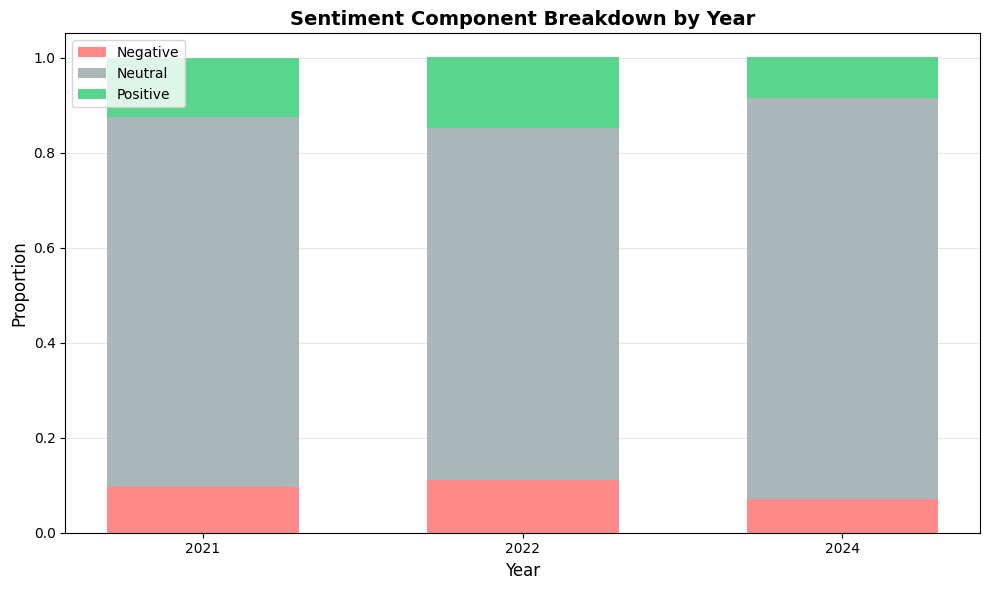

In [ ]:
years = ['2021', '2022', '2024']
overall_sentiments = [year_vibe, year_vibe_2022, year_vibe_2024]

neg_scores = [s['neg'] for s in overall_sentiments]
neu_scores = [s['neu'] for s in overall_sentiments]
pos_scores = [s['pos'] for s in overall_sentiments]
compound_scores = [s['compound'] for s in overall_sentiments]

plt.figure(figsize=(10, 6))

width = 0.6
plt.bar(years, neg_scores, width, label='Negative', color='#ff6b6b', alpha=0.8)
plt.bar(years, neu_scores, width, bottom=neg_scores, label='Neutral', color='#95a5a6', alpha=0.8)
plt.bar(years, pos_scores, width, bottom=np.array(neg_scores) + np.array(neu_scores), 
        label='Positive', color='#2ecc71', alpha=0.8)

plt.title('Sentiment Component Breakdown by Year', fontsize=14, fontweight='bold')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/Users/uwsthoughts/Desktop/github_sync/dolly_shield/data620_finalwork/sentiment_breakdown.png', dpi=150, bbox_inches='tight')
plt.show()

/var/folders/63/ll02nnt55hg596lxsqjs1bxw0000gn/T/ipykernel_36239/899618417.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(compound_scores_by_year, labels=years, patch_artist=True)


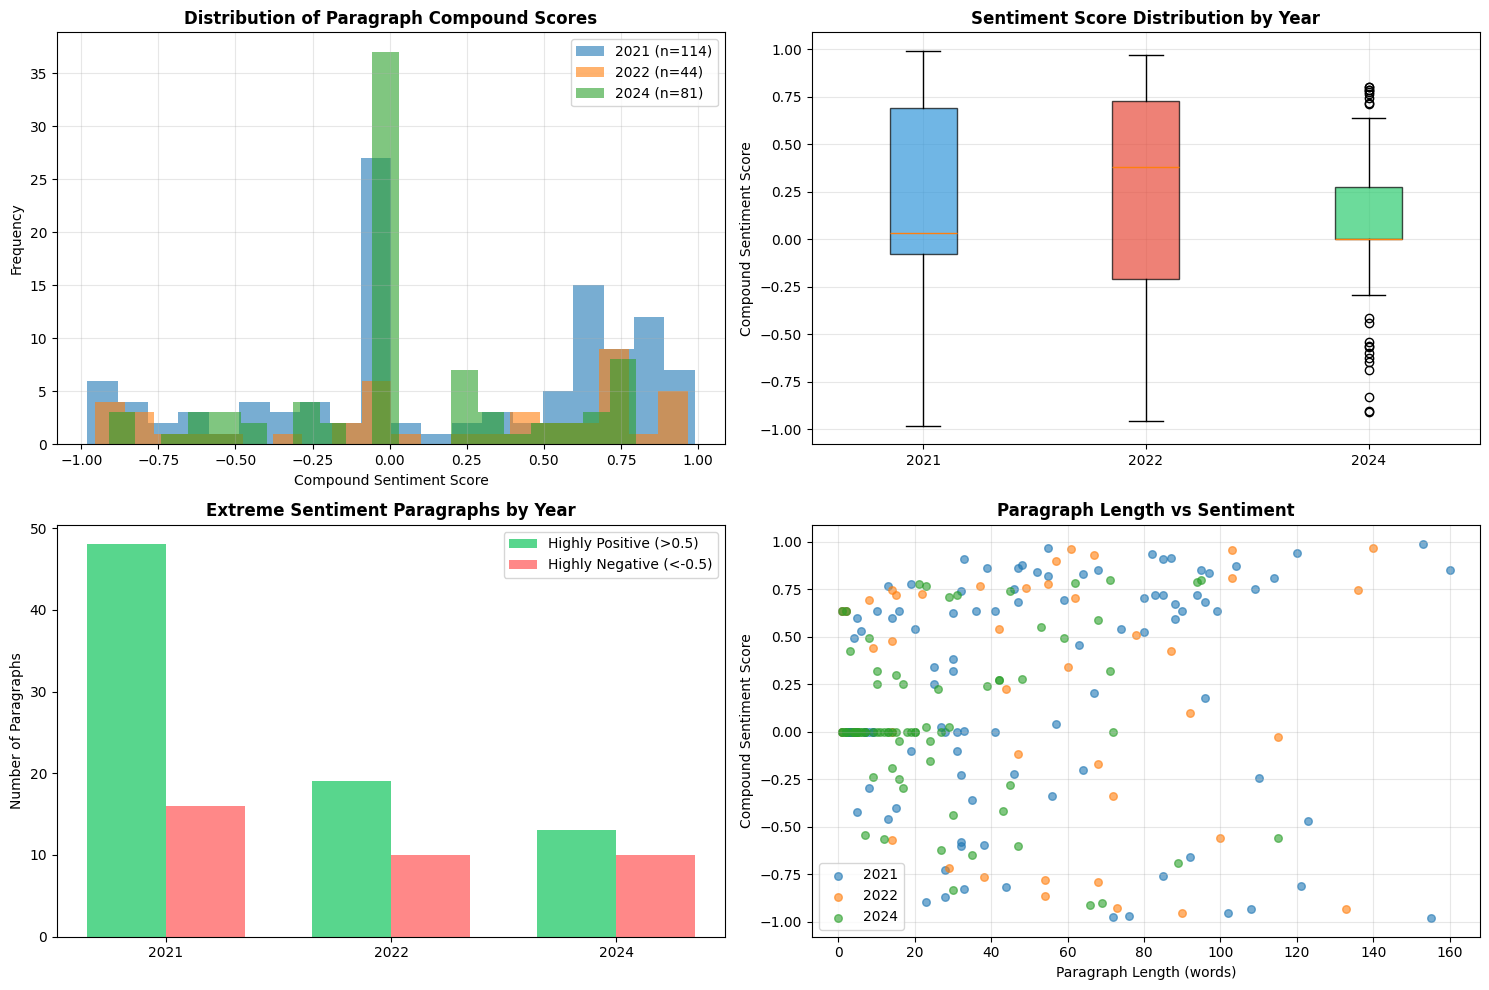

In [ ]:
all_paragraphs = {
    '2021': intra_vibe,
    '2022': intra_vibe_2022,
    '2024': intra_vibe_2024
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ax1 = axes[0, 0]
for year, data in all_paragraphs.items():
    compounds = [p['compound'] for p in data]
    ax1.hist(compounds, bins=20, alpha=0.6, label=f'{year} (n={len(compounds)})')
ax1.set_title('Distribution of Paragraph Compound Scores', fontweight='bold')
ax1.set_xlabel('Compound Sentiment Score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
compound_data = [all_paragraphs[year] for year in ['2021', '2022', '2024']]
compound_scores_by_year = [[p['compound'] for p in data] for data in compound_data]
box_plot = ax2.boxplot(compound_scores_by_year, labels=years, patch_artist=True)
colors = ['#3498db', '#e74c3c', '#2ecc71']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_title('Sentiment Score Distribution by Year', fontweight='bold')
ax2.set_ylabel('Compound Sentiment Score')
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
extreme_counts = {'Most Positive (>0.5)': [], 'Most Negative (<-0.5)': []}
for year, data in all_paragraphs.items():
    compounds = [p['compound'] for p in data]
    pos_extreme = sum(1 for c in compounds if c > 0.5)
    neg_extreme = sum(1 for c in compounds if c < -0.5)
    extreme_counts['Most Positive (>0.5)'].append(pos_extreme)
    extreme_counts['Most Negative (<-0.5)'].append(neg_extreme)

x = np.arange(len(years))
width = 0.35
ax3.bar(x - width/2, extreme_counts['Most Positive (>0.5)'], width, 
        label='Highly Positive (>0.5)', color='#2ecc71', alpha=0.8)
ax3.bar(x + width/2, extreme_counts['Most Negative (<-0.5)'], width, 
        label='Highly Negative (<-0.5)', color='#ff6b6b', alpha=0.8)
ax3.set_title('Extreme Sentiment Paragraphs by Year', fontweight='bold')
ax3.set_ylabel('Number of Paragraphs')
ax3.set_xticks(x)
ax3.set_xticklabels(years)
ax3.legend()

ax4 = axes[1, 1]
for year, data in all_paragraphs.items():
    lengths = [len(p['paragraph'].split()) for p in data]
    compounds = [p['compound'] for p in data]
    ax4.scatter(lengths, compounds, alpha=0.6, label=year, s=30)
ax4.set_title('Paragraph Length vs Sentiment', fontweight='bold')
ax4.set_xlabel('Paragraph Length (words)')
ax4.set_ylabel('Compound Sentiment Score')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/uwsthoughts/Desktop/github_sync/dolly_shield/data620_finalwork/paragraph_sentiment_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

### Analysis 

These shows clear shifts in emotional expression across love 2021 to 2021. The histogram reveals 2021 as the widest spread, with sentiment scattered across extremes. Meanwhile 2022 and 2024 are closer to neutral/positive. The box plot supports this, with 2021 showing the widest range and most outliers and later years displaying tighter distributions. Medians remain steady, but variance shrinks, signaling more emotionally regulated writing over time.

The bottom panels highlight that 2021 produced the most paragraphs with both highly positive and highly negative sentiment, while whereas by 2024 such extremes are reduced and muted. The length vs. sentiment scatter adds to this story: 2021 includes a lot of intense passages while 2022 and 2024 are more restrained. The pattern suggests a shift toward concision and steadier expression of my emotional place in the world.
